# 画像からメルスペクトログラムを生成する

In [2]:
import numpy as np
import librosa
import librosa.feature
import librosa.display
import matplotlib.pyplot as plt

In [3]:
# 音声ファイル(wav形式)
voiceData_path = "data/voice_datasets/disease/voice_data_bad_001.wav"

# 1. librosaで音声ファイル読み込み

In [4]:
# 音声ファイル読み込み
# サンプルレート44.1
y, sr = librosa.load(voiceData_path, sr=44100)

# 2. 短時間フーリエ変換（STFT）

## 2.1 振幅スペクトログラムを算出

In [5]:
D = np.abs(librosa.stft(y)) # STFT
D_dB = librosa.amplitude_to_db(D, ref=np.max)

## 2.2 振幅スペクトログラムを見る

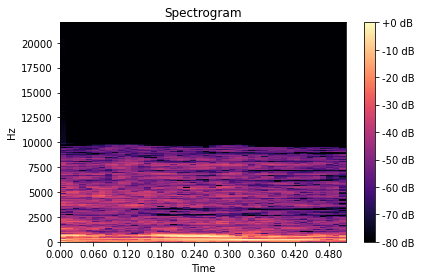

In [6]:
plt.figure()
plt.title("Spectrogram")
librosa.display.specshow(D_dB, sr=sr, x_axis="time", y_axis="hz")
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

## 2.3 メルスペクトログラムを算出
機械学習として扱う場合、音声特徴量として下のMFCCよりメルスペクトログラムを使用されることが多い。, [Deep Learning for Audio Signal Processing](https://arxiv.org/abs/1905.00078)

In [7]:
S = librosa.feature.melspectrogram(S=D, sr=sr)
S_dB = librosa.amplitude_to_db(S, ref=np.max)

## 2.4 メルスペクトログラムを見る

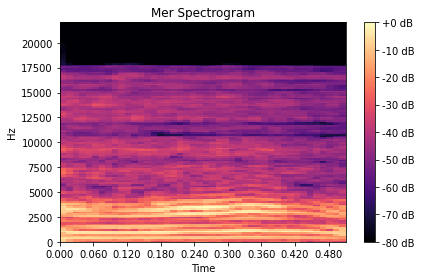

In [12]:
plt.figure()
plt.title("Mer Spectrogram")
librosa.display.specshow(S_dB, sr=sr, x_axis="time", y_axis="hz")
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

## 2.5 ついでに、MFCC（メル周波数ケプストラム係数）を算出
n_mfccを大きい値にすると、メル周波数スペクトル包絡のより細かい成分まで考慮することができる。  
ただし、特徴ベクトルとして次元数が増えてしまうこともあり、分析や機械学習で使う場合は12～24くらいの次元数がよく使われる。

In [9]:
n_mfcc = 20
mfcc = librosa.feature.mfcc(S=S_dB, sr=sr, n_mfcc=n_mfcc, dct_type=3)

## 2.6 MFCCを見る

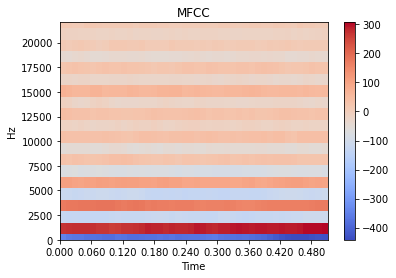

In [10]:
plt.figure()
plt.title("MFCC")
librosa.display.specshow(mfcc, sr=sr, x_axis="time", y_axis="hz")
plt.colorbar()
plt.show()